# Signals

We will briefly overview basic signal processing concepts through examples of common sound sources in ocean acoustics. 

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

## Sine Wave

Continuous wave is a signal with constant amplitude and frequency. A sine wave is one example:

$y(t) = A \sin(2 \pi f t + \mathcal{\phi)}$,

where:
* $A$ - peak of the deviation of the function from zero
* $f$ - the number of oscillations occurring within a second
* $\phi$ - where in the cycle the wave is at zero (in radians)


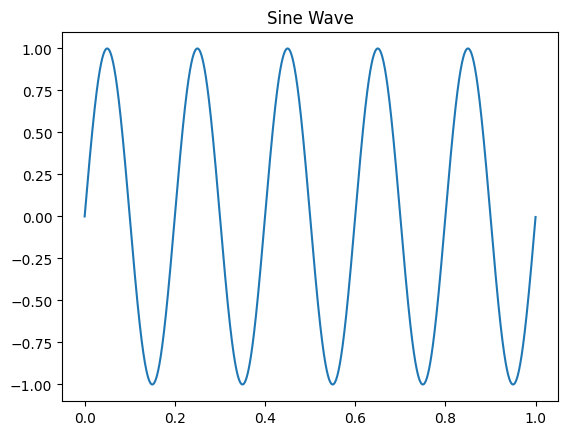

In [18]:
freq = 5
N = 10000
end_time = 1
time = np.linspace(0, end_time, end_time*N, endpoint=False) # 1 sec
A = 1
cw = A*np.sin(2*np.pi*freq*time) # zero phase
plt.title("Sine Wave")
plt.plot(time, cw)

In [4]:
import IPython.display as ipd

In [5]:
freq = 100
ipd.Audio(A*np.sin(2*np.pi*freq*time), rate=N)

In [6]:
from ipywidgets import interact
import ipywidgets as widgets

In [7]:
freq_slider = widgets.IntSlider(
    value=5,
    min=1,
    max=1000,
    step=1,
    description='Frequency (Hz):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
)

In [38]:
def plot_sine_wave(A, freq, end_time):
    N = 1000
    time = np.linspace(0, end_time, N, endpoint=False) # 1 sec
    cw = A*np.sin(2*np.pi*freq*time) # zero phase
    plt.title("Sine Wave")
    plt.plot(time, cw)
    plt.xlabel("Time")

In [9]:
out = interact(plot_sine_wave, A=100, freq=5, end_time=1)

interactive(children=(IntSlider(value=100, description='A', max=300, min=-100), IntSlider(value=5, description…

## Chirp

Another example of a signal is a **chirp**, or a signal with an increasing or decreasing frequency.

We will generate example with linearly increasing frequency from 1Hz to 10Hz.

Text(0.5, 1.0, 'Upchirp')

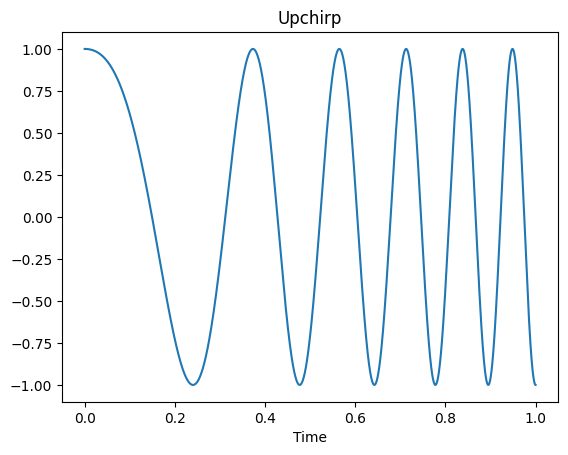

In [37]:
import scipy as sp
chirp = sp.signal.chirp(time, f0=1, t1=1, f1=10)
plt.plot(time, chirp)
plt.xlabel("Time")
plt.title("Upchirp")

In [11]:
freq = 100
ipd.Audio(sp.signal.chirp(time, f0=1, t1=1, f1=100), rate=N)

In [35]:
def plot_chirp(f0, f1):
    N = 1000
    time = np.linspace(0, end_time, N, endpoint=False) # 1 sec
    chirp = sp.signal.chirp(time, f0=f0, t1=1, f1=f1) # zero phase, upchirp
    plt.title("Upchirp")
    plt.plot(time, chirp)
    plt.xlabel("Time")

In [13]:
out = interact(plot_chirp, f0=1, t1=1, f1=10)

interactive(children=(IntSlider(value=1, description='f0', max=3, min=-1), IntSlider(value=10, description='f1…

## Gated Chirp

Sometimes we want to transmit a "short chirp", which can be achieved by turning the transmitter on and off. We can generate one by tapering it off with a hat function.




Text(0.5, 0, 'Sample number')

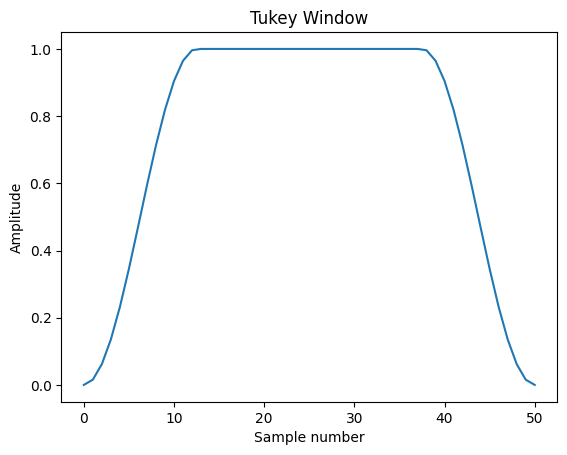

In [17]:
window = signal.windows.tukey(51)

plt.plot(window)
plt.title("Tukey Window")
plt.ylabel("Amplitude")
plt.xlabel("Sample number")

Text(0.5, 0, 'Time')

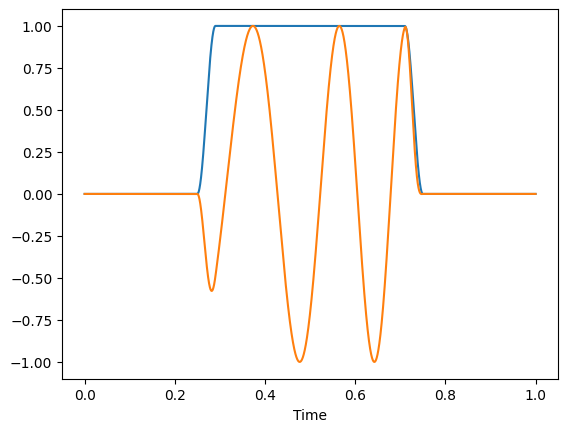

In [33]:
left = np.zeros(int(len(chirp)/4))
right = np.zeros(int(len(chirp)/4))
middle_window = signal.windows.tukey(int(len(chirp)/2), alpha=0.16)
window = np.hstack((left, middle_window, right))

plt.plot(time, window)
chirp_short =  chirp * window

plt.plot(time, chirp_short)
plt.xlabel("Time")

In [39]:
ipd.Audio(chirp_short, rate=N)

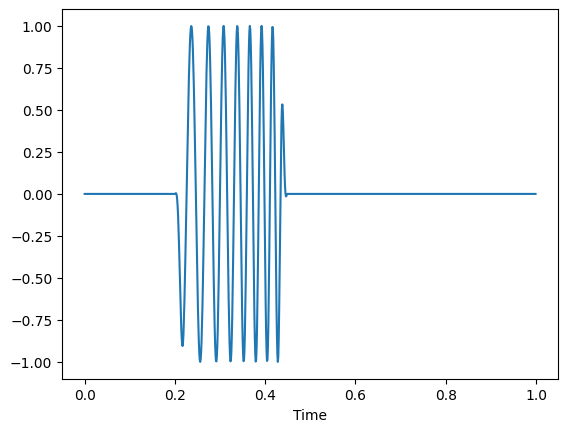

In [79]:
plot_chirp_short(0.2)

In [2]:
def plot_chirp_short(offset):
   if offset>0.1 and offset<0.7:
       N = 1000
       time = np.linspace(0, end_time, N, endpoint=False) # 1 sec
       chirp = sp.signal.chirp(time, f0=1, t1=1, f1=100) # zero phase, upchirp
       left = np.zeros(int(offset*N))        middle_window = signal.windows.tukey(int(N/4), alpha=0.16)
       right = np.zeros(N-int(offset*N)-int(N/4))
       window = np.hstack((left, middle_window, right))
       chirp_short =  chirp * window
       plt.plot(time, chirp_short)
       plt.xlabel("Time")

SyntaxError: invalid syntax (4131126449.py, line 6)

In [78]:
# interact(plot_chirp_short, offset=0.5)

## Impulse

Text(0.5, 1.0, 'Impulse')

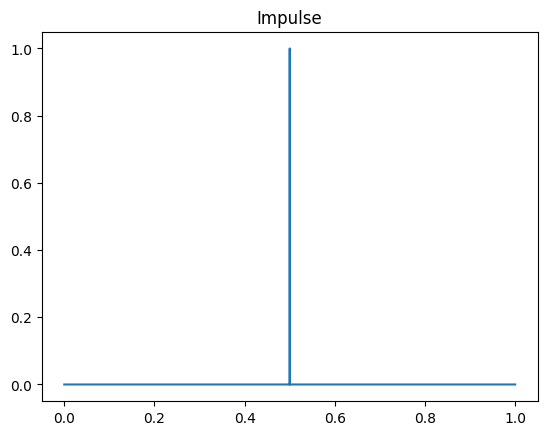

In [13]:
y = sp.signal.unit_impulse(len(time), round(len(time)/2))
plt.plot(time, y,)
plt.title("Impulse")

In [14]:
ipd.Audio(sp.signal.unit_impulse(len(time), round(len(time)/2)), rate=N)